# Problem Understanding

The Titanic competition is a classification problem where we are tasked with predicting whether or not a passenger survived the ship's sinking.

**Goal:** place in top the 10% of rolling leaderboard.

In [1]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set the random seed state for reproducibility
random_state = 42

In [2]:
# import train and test set
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
# confirm train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# confirm test_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# get basic info on the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# get basic info on the test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Dimensions**

* The training data has 891 rows and 11 columns. 
* The test data has 418 rows and 10 columns.
* `Survived` is the dependent variable.

**Data Dictionary**

* `PassengerId` - int. Key.
* `Survived` - int. Survival. Boolean.
* `Pclass` - int. Ticket class.
* `Name` - str. Name of passenger.
* `Sex` - str. Sex of passenger.
* `Age` - float. Age of passenger. If age is estimated, takes xx.5. Has nulls.
* `SibSp` - int. # of siblings/spouses on board.
* `Parch` - int. # of parents/ children aboard the titanic.
* `Ticket` - str. Ticket number.
* `Fare` - float. Fare paid by passenger. Has nulls.
* `Cabin` - str. Cabin of passenger. Has nulls.
* `Embarked` - str. Port of embarkation. C = Cherbourg, Q = Queenstown, S = Southampton. Has nulls.

**Initial Hypotheses**

* Young children will survive.
* Young women will survive.
* Rich people will survive.
* Location on ship matters.
* Titles will or will not survive (depending on title).
* Larger families will not survive.

---
# Data Understanding

## Dependent Variable EDA

In [7]:
# set id and dependent variable
id_variable= 'PassengerId'
dependent_variable = 'Survived'

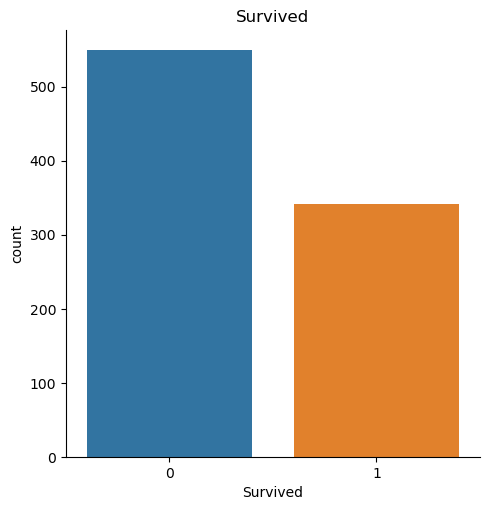

In [8]:
# Survived
sns.catplot(x=dependent_variable, data=train_df, kind='count').set(title=dependent_variable)
plt.show()

`Survived` is relatively balanced (62:38 split).

## Categorical EDA

### Pclass

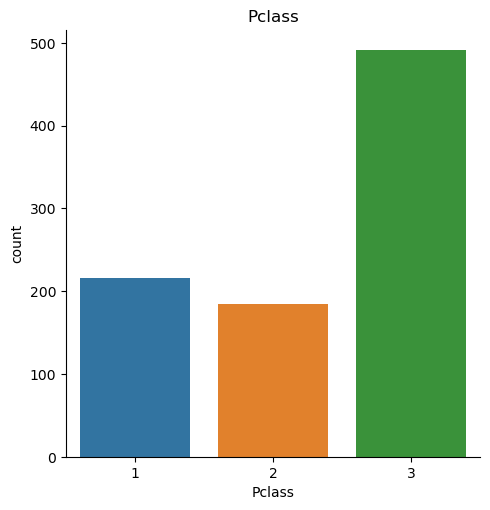

In [9]:
# PClass
sns.catplot(x='Pclass', data=train_df, kind='count').set(title='Pclass')
plt.show()

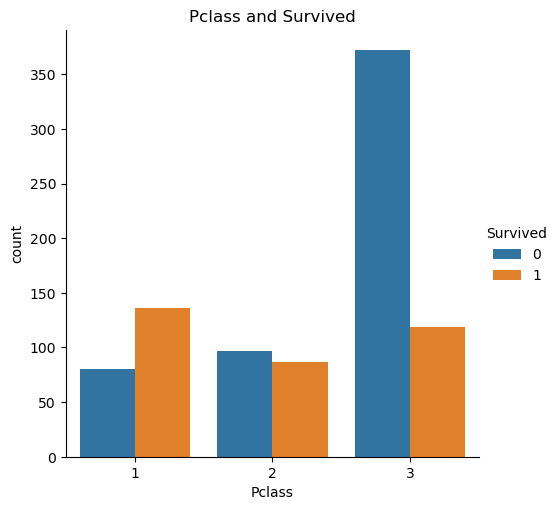

In [10]:
# PClass and Survived
sns.catplot(x='Pclass', hue=dependent_variable, data=train_df, kind='count').set(title='Pclass and Survived')
plt.show()

As expected, `Pclass` appears to be correlated with survival.

### Sex

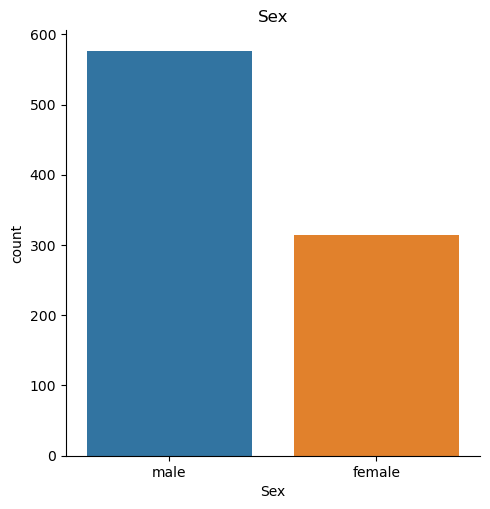

In [11]:
# Sex
sns.catplot(x='Sex', data=train_df, kind='count').set(title='Sex')
plt.show()

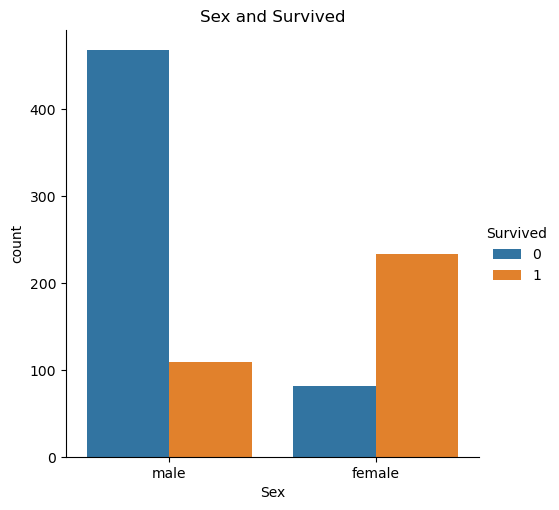

In [12]:
# Sex and Survived
sns.catplot(x='Sex', hue=dependent_variable, data=train_df, kind='count').set(title='Sex and Survived')
plt.show()

`Sex` appears to be correlated with survival.

### Embarked

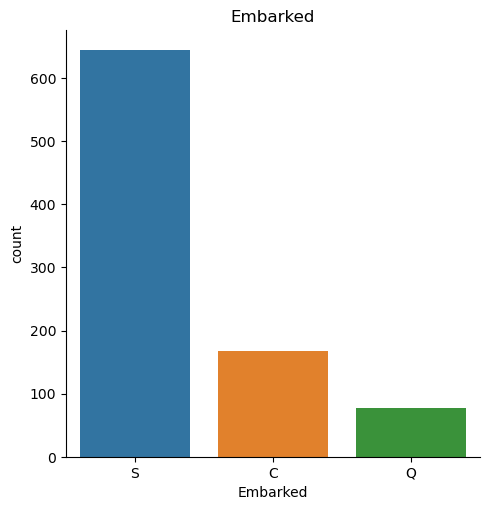

In [13]:
# Embarked
sns.catplot(x='Embarked', data=train_df, kind='count').set(title='Embarked')
plt.show()

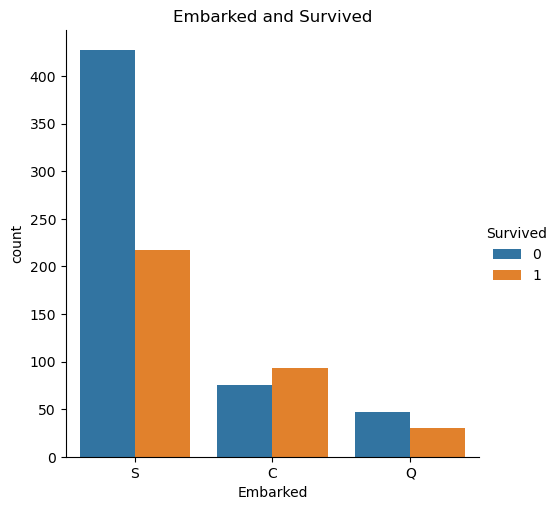

In [14]:
# Embarked and Survived
sns.catplot(x='Embarked', hue=dependent_variable, data=train_df, kind='count').set(title='Embarked and Survived')
plt.show()

`Embarked` appears to be correlated with survival. However,`Embarked` may be correlated with `Pclass` (given the nature of English economic geography at this time).

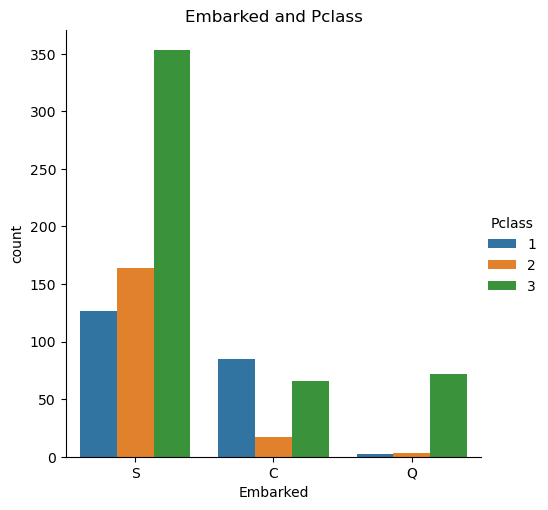

In [15]:
# Embarked and Pclass
sns.catplot(x='Embarked', hue='Pclass', data=train_df, kind='count').set(title='Embarked and Pclass')
plt.show()

S is disproportionately 3rd class. The relationship between `Embarked` appears to be a spurious correlation. `Pclass` is likely the underlying structure driving survival here.

## Quantitative EDA

In [16]:
# basic distributions of train_df
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# basic distributions of test_df
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Age

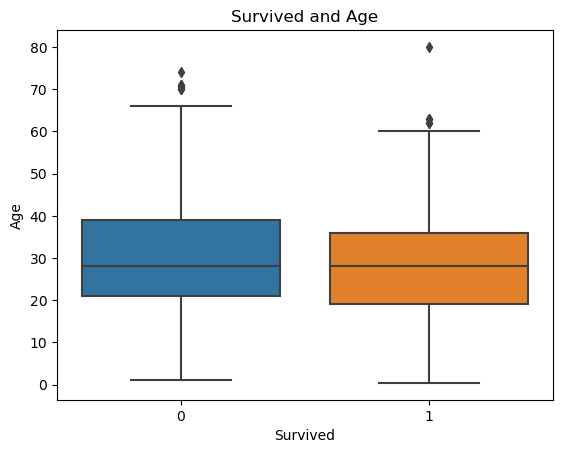

In [18]:
# Survived and Age
sns.boxplot(x=dependent_variable, y='Age', data=train_df).set(title='Survived and Age')
plt.show()

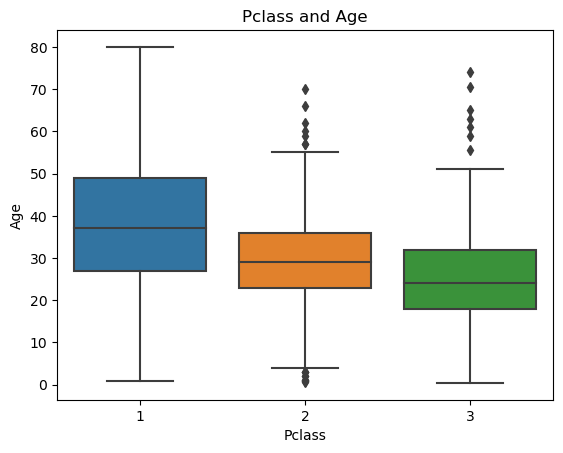

In [19]:
# Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=train_df).set(title='Pclass and Age')
plt.show()

1st class is older than second class which is older than 3rd class on average. Second class has fewer children.

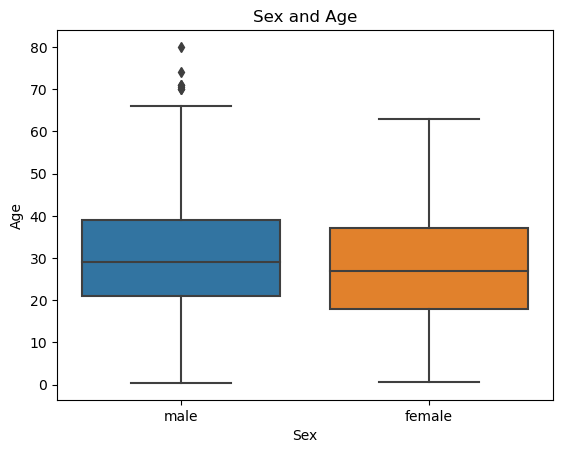

In [20]:
# Sex and Age
sns.boxplot(x='Sex', y='Age', data=train_df).set(title='Sex and Age')
plt.show()

Men were slightly older in general and had all the elderly individuals.

---
# Data Preparation

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Null Imputation

**Categorical columns with nulls**

* `Cabin` (train and test)
* `Embarked` (train)

**Numerical columns with nulls**

* `Age` (train and test)
* `Fare` (test)


In [23]:
# Cabin impute using 'NA'
train_df['Cabin'] = train_df['Cabin'].fillna('NA') 
test_df['Cabin'] = test_df['Cabin'].fillna('NA') 

In [24]:
# Embarked impute using mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

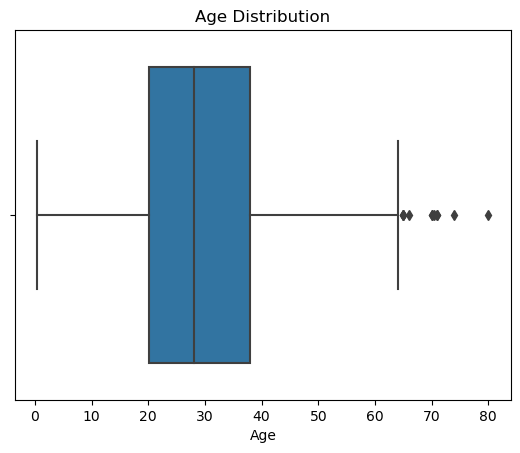

In [25]:
# checking Age for distribution and outliers
sns.boxplot(x='Age', data=train_df).set(title='Age Distribution')
plt.show()

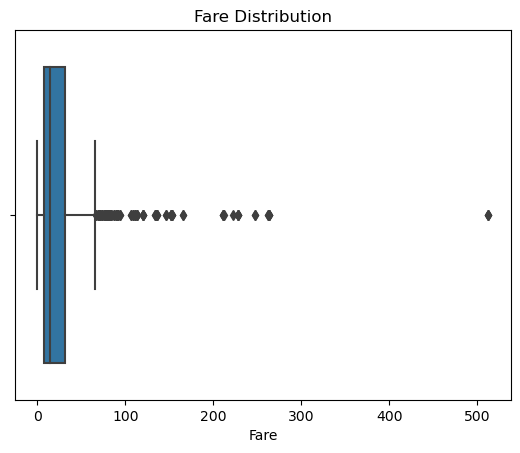

In [26]:
# checking Fare for distribution and outliers
sns.boxplot(x='Fare', data=train_df).set(title='Fare Distribution')
plt.show()

`Age` is relatively symmetrical and that `Fare` is right skewed. I will use mean imputation for `Age` and median imputation for `Fare`.

In [27]:
# Age impute
train_age_mean = train_df['Age'].mean()

train_df['Age'] = train_df['Age'].fillna(train_age_mean)

test_df['Age'] = test_df['Age'].fillna(train_age_mean)

In [28]:
# Fare impute
train_fare_median = train_df['Fare'].median()

test_df['Fare'] = test_df['Fare'].fillna(train_fare_median)

*Note*: I use attributes from the train dataset in order to impute for the test dataset.

In [29]:
# confirm the imputation worked
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# confirm the imputation worked
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are no more null values in either dataset.

## Feature Engineering

### Age Bucket

Bucket `Age` into 'baby', 'child', 'adult', and 'elderly'

In [31]:
# age_bucket
age_bins = [0, 18, 65, 100]
age_labels = ['child','adult', 'elderly']

train_df['age_bucket'] = pd.cut(x=train_df['Age'], bins=age_bins,labels=age_labels).astype('object')

test_df['age_bucket'] = pd.cut(x=test_df['Age'], bins=age_bins, labels=age_labels).astype('object')

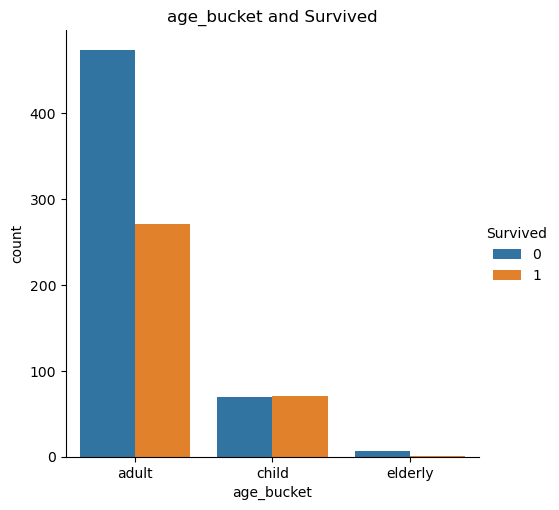

In [32]:
# ship_location and survived
sns.catplot(x='age_bucket', hue=dependent_variable, data=train_df, kind='count').set(title='age_bucket and Survived')
plt.show()

Being either a child or elderly appears to improve survival rate.

### Role

I noticed in examining the data that certain names have titles (Mr, Ms, Don, Capt, etc.) and I want to bucket these into roles.

In [33]:
# extract titles
train_df[['last_name','intermediate']] = train_df['Name'].str.split(', ', expand=True)
train_df[['title','first_name']] = train_df['intermediate'].str.split('.', 1, expand=True)

test_df[['last_name','intermediate']] = test_df['Name'].str.split(', ', expand=True)
test_df[['title','first_name']] = test_df['intermediate'].str.split('.', 1, expand=True)

# name length as a proxy for role importance
train_df['name_length'] = train_df['Name'].str.len()
test_df['name_length'] = test_df['Name'].str.len()

In [34]:
# unique last names
train_last_name_set = set(train_df['last_name'].tolist())
test_last_name_set = set(test_df['last_name'].tolist())
last_name_sorted = sorted(train_last_name_set.union(test_last_name_set))
last_name_intersect = train_last_name_set.intersection(test_last_name_set)

print(last_name_sorted)

print("Number of unique last names:", len(last_name_sorted))
print("Number of shared last names:", len(last_name_intersect))
print("Number of records:", len(train_df) + len(test_df))

['Abbing', 'Abbott', 'Abelseth', 'Abelson', 'Abrahamsson', 'Abrahim', 'Adahl', 'Adams', 'Ahlin', 'Aks', 'Albimona', 'Aldworth', 'Alexander', 'Alhomaki', 'Ali', 'Allen', 'Allison', 'Allum', 'Andersen', 'Andersen-Jensen', 'Anderson', 'Andersson', 'Andreasson', 'Andrew', 'Andrews', 'Angheloff', 'Angle', 'Appleton', 'Arnold-Franchi', 'Aronsson', 'Artagaveytia', 'Ashby', 'Asim', 'Asplund', 'Assaf', 'Assaf Khalil', 'Assam', 'Astor', 'Attalah', 'Aubart', 'Augustsson', 'Ayoub', 'Baccos', 'Backstrom', 'Baclini', 'Badman', 'Badt', 'Bailey', 'Baimbrigge', 'Balkic', 'Ball', 'Banfield', 'Barah', 'Barbara', 'Barber', 'Barkworth', 'Barry', 'Barton', 'Bateman', 'Baumann', 'Baxter', 'Bazzani', 'Beane', 'Beattie', 'Beauchamp', 'Beavan', 'Becker', 'Beckwith', 'Beesley', 'Behr', 'Bengtsson', 'Bentham', 'Berglund', 'Berriman', 'Betros', 'Bidois', 'Bing', 'Bird', 'Birkeland', 'Birnbaum', 'Bishop', 'Bissette', 'Bjorklund', 'Bjornstrom-Steffansson', 'Blackwell', 'Blank', 'Bonnell', 'Borebank', 'Bostandyeff', 

There are 875 last names and 1309 records, therefore some passengers have the same last name. Furthermore, there are 144 last names shared between the training and test sets. We will group by `last_name` later on to try and extract information.

In [35]:
# unique titles
train_title_set = set(train_df['title'].tolist())
test_title_set = set(test_df['title'].tolist())
title_sorted = sorted(train_title_set.union(test_title_set))

print(title_sorted)

['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [36]:
# assign titles to roles
def assign_role(row):
    if row['title'] in ['Capt', 'Col', 'Major']:
        return 'officer'
    elif row['title'] in ['Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Master', 'Rev', 'Sir', 'the Countess']:
        return 'important'
    elif row['title'] in ['Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms']:
        return 'average'
    
train_df['role'] = train_df.apply(lambda row: assign_role(row), axis=1)
test_df['role'] = test_df.apply(lambda row: assign_role(row), axis=1)

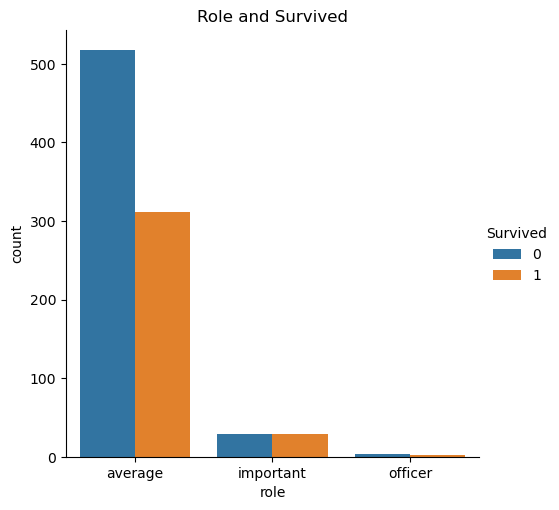

In [37]:
# role and survived
sns.catplot(x='role', hue=dependent_variable, data=train_df, kind='count').set(title='Role and Survived')
plt.show()

Both "important" and "officer" roles appear to improve survival rate.


In [38]:
# drop intermediate
# drop others
train_df = train_df.drop(columns=['title', 'intermediate', 'first_name', 'Name'])
test_df = test_df.drop(columns=['title', 'intermediate', 'first_name', 'Name'])

### Ship Location

Ship location may matter due to proximity to lifeboats and upper deck access. 

One can refer to the following [article](https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic) for a schematic of the titanic's deck.


In [39]:
# unique titles from each data set
train_set = set(train_df['Cabin'].tolist())
test_set = set(test_df['Cabin'].tolist())
sorted_set = sorted(train_set.union(test_set))

print(sorted_set)

print("Number of unique cabins:", len(sorted_set))
print("Number of records:", len(train_df) + len(test_df))

['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22', 'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110', 'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28', 'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86', 'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D22', 'D26', 'D28', 'D30', 'D33', 'D34', 'D35', 'D36

Some passengers have multiple cabins, but they all appear to be in the same general `ship_location`.

There are 187 cabins and 1309 records, therefore some passengers are traveling in the same cabin. We will group by `Cabin` later on to try and extract information.

In [40]:
# ship_location
train_df['ship_location'] = train_df['Cabin'].astype(str).str[0]
test_df['ship_location'] = test_df['Cabin'].astype(str).str[0]

I want to see if how `ship_location` relates to survival and Pclass.

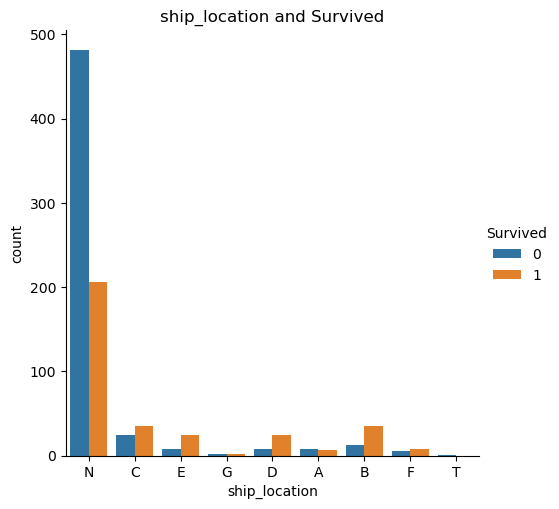

In [41]:
# ship_location and survived
sns.catplot(x='ship_location', hue=dependent_variable, data=train_df, kind='count').set(title='ship_location and Survived')
plt.show()

Some locations appear to correlate with higher chances of survival.

This also makes me think that passenger class correlates with having been assigned a cabin at all.

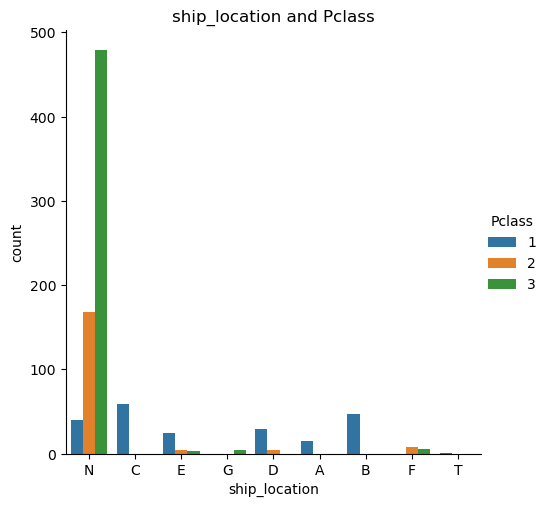

In [42]:
# ship_location and Pclass
sns.catplot(x='ship_location', hue='Pclass', data=train_df, kind='count').set(title='ship_location and Pclass')
plt.show()

Pclass correlates with having been assigned a cabin.

### Ticket

We may be able to link passengers that are traveling together to the same ticket.

In [43]:
# compare unique tickets
train_set = set(train_df['Ticket'].tolist())
test_set = set(test_df['Ticket'].tolist())
sorted_set = sorted(train_set.union(test_set))

print("Number of unique tickets:", len(sorted_set))
print("Number of records:", len(train_df) + len(test_df))

Number of unique tickets: 929
Number of records: 1309


There are 929 tickets and 1309 records, therefore some passengers are traveling on the same ticket. We will group by `Ticket` later on to try and extract information.

### Family Size

Family size is total amount of siblings, spouses, parents and children.

In [44]:
# family_size
train_df['family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

I want to see how family_size relates to survival.

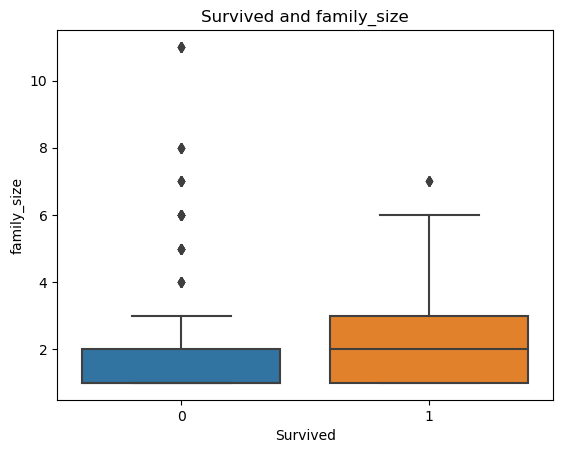

In [45]:
# survival and family_size
sns.boxplot(x='Survived', y='family_size', data=train_df).set(title='Survived and family_size')
plt.show()

It appears larger overall families survive more. This surprises me. Lets examine it further by treating it like a categorical variable.

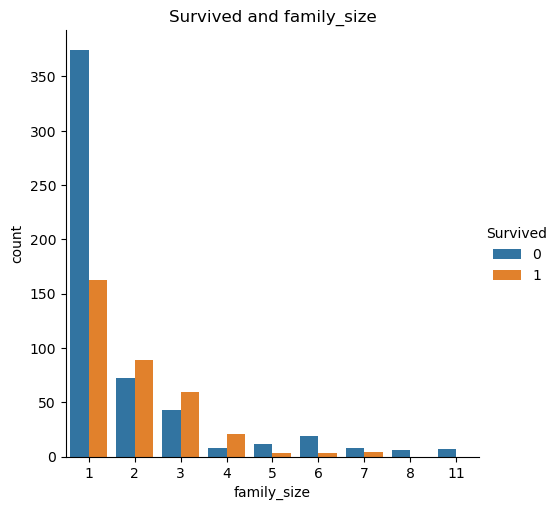

In [46]:
# family_size and survived
sns.catplot(x='family_size', hue=dependent_variable, data=train_df, kind='count').set(title='Survived and family_size')
plt.show()

Solo travelers ang big families have a much different outcomes.



In [47]:
# age_bucket
bins = [0,1,4,20]
labels = ['solo','normal_family', 'big_family']

train_df['family_bucket'] = pd.cut(x=train_df['family_size'], bins=bins,labels=labels).astype('object')

test_df['family_bucket'] = pd.cut(x=test_df['family_size'], bins=bins, labels=labels).astype('object')

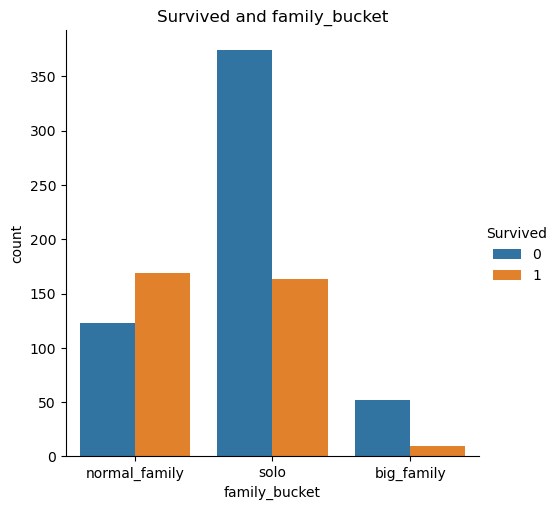

In [48]:
# family_size and survived
sns.catplot(x='family_bucket', hue=dependent_variable, data=train_df, kind='count').set(title='Survived and family_bucket')
plt.show()

### Encode Categorical

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          891 non-null    object 
 10  Embarked       891 non-null    object 
 11  age_bucket     891 non-null    object 
 12  last_name      891 non-null    object 
 13  name_length    891 non-null    int64  
 14  role           891 non-null    object 
 15  ship_location  891 non-null    object 
 16  family_size    891 non-null    int64  
 17  family_bucket  891 non-null    object 
dtypes: float64

In [50]:
# function for re-use
def group_by_shared_feature(train_df, test_df, col):
    col_list = [col, 'Sex', 'age_bucket', 'role']
    
    train_df = train_df[col_list].copy()
    test_df = test_df[col_list].copy()

    df = pd.concat([train_df, test_df])
    df = pd.get_dummies(df, columns=col_list[1:])

    agg_df = df.groupby(by=col).agg({
        "Sex_female" : 'mean',
        "age_bucket_child" : 'mean',
        "role_important" : 'mean'
    }).reset_index()
    
    agg_df.columns = [col, f'{col}_female_perc', f'{col}_child_perc', f'{col}_role_important_perc']
    
    return agg_df

The idea here is that higher female, child, and important role percentages increases survivability for everyone in the group.

In [51]:
# dummy and perc list
survival_col_list = ['Pclass', 'Embarked', 'age_bucket', 'family_bucket', 'role', 'ship_location']
dummy_col_list = ['Pclass', 'Sex', 'Embarked', 'age_bucket', 'family_bucket', 'role', 'ship_location']

# convert to dummy percentages for the remainder
for col in survival_col_list:
    survival_col = f'{col}_survival'
    train_agg_df = train_df.groupby(by=col).agg({dependent_variable : 'mean'}).reset_index()
    train_agg_df.columns = [col, survival_col]
    
    train_df = pd.merge(train_df, train_agg_df, how='left', on=col)
    test_df = pd.merge(test_df, train_agg_df, how='left', on=col)
    
    # fill na where match not found
    test_df[survival_col] = test_df[survival_col].fillna(train_age_mean)
    
#     agg_df = group_by_shared_feature(train_df, test_df, col)

#     train_df = pd.merge(train_df, agg_df, how='left', on=col)
#     test_df = pd.merge(test_df, agg_df, how='left', on=col)
    
# get dummies
train_df = pd.get_dummies(train_df, columns=dummy_col_list)
test_df = pd.get_dummies(test_df, columns=dummy_col_list)

In [52]:
assoc_col_list = ['last_name', 'Ticket', 'Cabin']

# drop perc_col_list
train_df.drop(assoc_col_list, inplace=True, axis=1)
test_df.drop(assoc_col_list, inplace=True, axis=1)

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PassengerId                  891 non-null    int64  
 1   Survived                     891 non-null    int64  
 2   Age                          891 non-null    float64
 3   SibSp                        891 non-null    int64  
 4   Parch                        891 non-null    int64  
 5   Fare                         891 non-null    float64
 6   name_length                  891 non-null    int64  
 7   family_size                  891 non-null    int64  
 8   Pclass_survival              891 non-null    float64
 9   Embarked_survival            891 non-null    float64
 10  age_bucket_survival          891 non-null    float64
 11  family_bucket_survival       891 non-null    float64
 12  role_survival                891 non-null    float64
 13  ship_location_surviv

### Transform Numerical

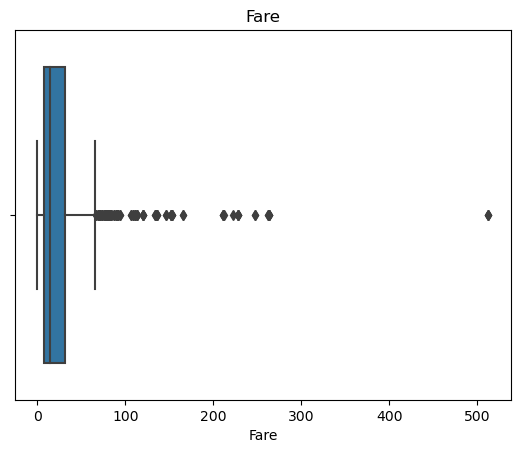

In [54]:
# Fare
sns.boxplot(x='Fare', data=train_df).set(title='Fare')
plt.show()

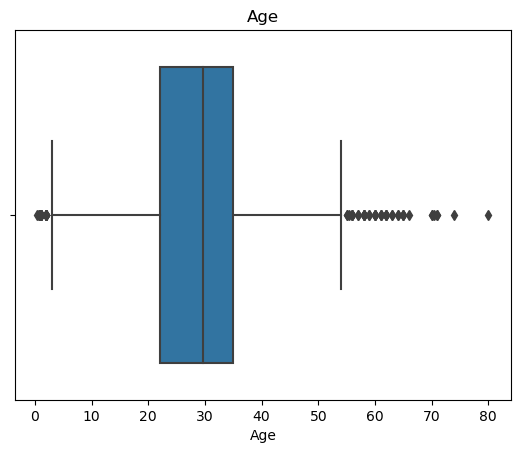

In [55]:
# Age
sns.boxplot(x='Age', data=train_df).set(title='Age')
plt.show()

`Fare` is right-skewed. I will log transform.

In [56]:
# log transform Fare
train_df['fare_log'] = np.log(train_df['Fare']+1)
test_df['fare_log'] = np.log(test_df['Fare']+1)

## Column Confirmation

In [57]:
# confirm that both df have the same dimensions at this point
train_set = set(train_df.columns)
test_set = set(test_df.columns)

test_train_diff_set = test_set - train_set
train_test_diff_set = train_set - test_set
train_test_union_set = train_set.intersection(test_set)
print(f'Columns in test not in train: {test_train_diff_set}')
print(f'Columns in train not in test: {train_test_diff_set}')

Columns in test not in train: set()
Columns in train not in test: {'Survived', 'ship_location_T'}


In [58]:
# make sure there are no differences in columns
train_col_list = list(train_test_union_set)
train_col_list.append(dependent_variable)

test_col_list = list(train_test_union_set)

train_df = train_df[train_col_list].copy()
test_df = test_df[test_col_list].copy()

In [59]:
# confirm that both df have the same dimensions at this point
train_set = set(train_df.columns)
test_set = set(test_df.columns)

test_train_diff_set = test_set - train_set
train_test_diff_set = train_set - test_set
train_test_union_set = train_set.intersection(test_set)
print(f'Columns in test not in train: {test_train_diff_set}')
print(f'Columns in train not in test: {train_test_diff_set}')

Columns in test not in train: set()
Columns in train not in test: {'Survived'}


---
# Modeling

In [60]:
# imports
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [61]:
# split train into x and y
y_train = train_df[dependent_variable].copy()
x_train = train_df.drop(columns=[id_variable,dependent_variable], axis=1).copy()

In [62]:
# scale columns
scale_col_list = x_train.columns

train_scaler = StandardScaler().fit(x_train[scale_col_list].values)

x_train = pd.DataFrame(train_scaler.fit_transform(x_train[scale_col_list].values), columns=scale_col_list, index=x_train.index)

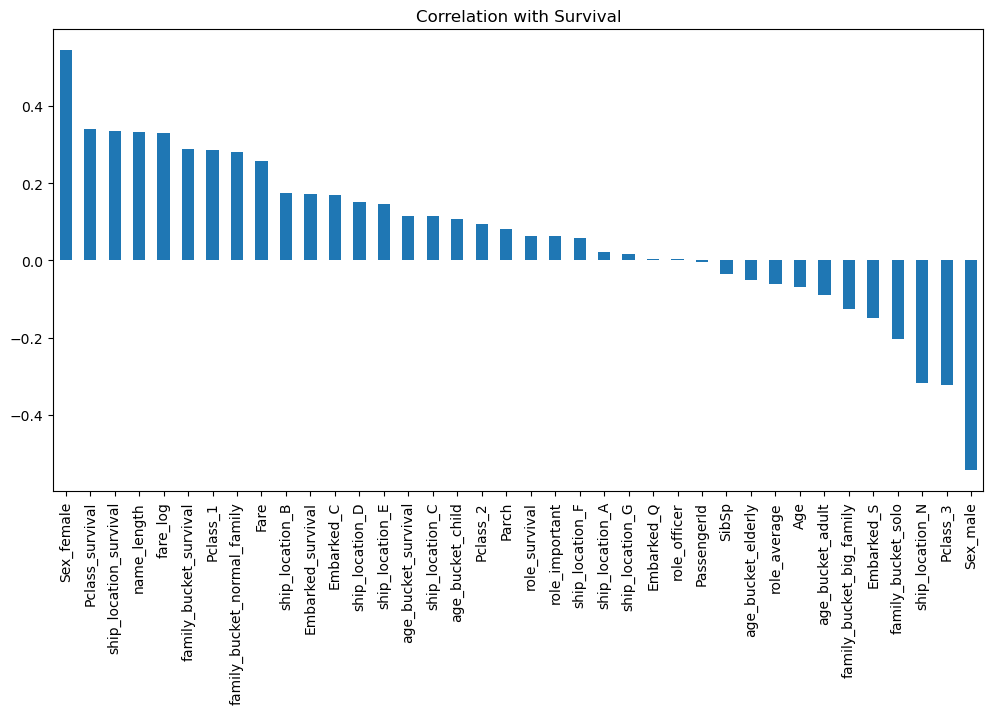

In [63]:
# correlation graph with survival
correlation = train_df.iloc[:, 1:].corr()[dependent_variable].sort_values(ascending=False)

correlation[1:].plot(kind='bar', figsize=(12,6), title='Correlation with Survival')
plt.show()

In [64]:
# shared parameters
cv = 10

random_state=42
n_jobs = -1

base_params = {
    'random_state': random_state,
    'n_jobs': n_jobs
}

In [65]:
def grid_search_model(x_train, y_train, model, param_grid, cv, n_jobs):
    # grid search CV to pick features
    print("Searching for best hyperparameters")
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=cv,
        n_jobs=n_jobs,
        scoring='accuracy'
    )
    
    grid_search.fit(x_train.values, y_train.values)
    
    best_hyperparameters = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best hyperparameters:", best_hyperparameters)
    print("Best mean cross-validated score:", best_score)
    
    return best_hyperparameters

## Random Forest Classifier

In [66]:
# random forest classifier
print("Building random forest model")
model = RandomForestClassifier().set_params(**base_params)

param_grid = {
    'n_estimators': [1000],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

rf_best_hyperparameters = grid_search_model(x_train, y_train, model, param_grid, cv, n_jobs)

# fit model
rf_model = RandomForestClassifier(**{**base_params,**rf_best_hyperparameters})
rf_model.fit(x_train.values, y_train.values)

Building random forest model
Searching for best hyperparameters
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
Best mean cross-validated score: 0.8339450686641697


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=1000,
                       n_jobs=-1, random_state=42)

## XGBoost Classifier

In [67]:
# # xgboost classifier
# print("Building XGBoost model")
# model = XGBClassifier().set_params(**base_params)

# param_grid = {
#     'n_estimators': [500],
#     'max_depth': [8],
#     'learning_rate': [0.005]
# }

# xgb_best_hyperparameters = grid_search_model(x_train, y_train, model, param_grid, cv, n_jobs)

# # fit model
# xgb_model = XGBClassifier(**{**base_params,**xgb_best_hyperparameters})
# xgb_model.fit(x_train.values, y_train.values)

## LightGBM Classifier

In [68]:
# # lightgbm classifier
# print("Building lightgbm model")
# model = LGBMClassifier().set_params(**base_params)

# param_grid = {
#     'n_estimators': [1000],
#     'max_depth': [10],
#     'min_child_samples': [10],
#     'learning_rate': [0.01]
# }

# lgbm_best_hyperparameters = grid_search_model(x_train, y_train, model, param_grid, cv, n_jobs)

# # fit model
# lgbm_model = LGBMClassifier(**{**base_params,**lgbm_best_hyperparameters})
# lgbm_model.fit(x_train.values, y_train.values)

---
# Submission

In [69]:
# fit model
final_model = rf_model

# construct submission
submission_df = pd.DataFrame()
submission_df[id_variable] = test_df[id_variable].copy()
test_df.drop([id_variable], inplace=True, axis=1)

# scale test
test_scaler = StandardScaler().fit(test_df[scale_col_list].values)
sc_test_df = pd.DataFrame(test_scaler.fit_transform(test_df[scale_col_list].values), columns=scale_col_list, index=test_df.index)

# make predictions
pred =  final_model.predict(sc_test_df.values)
submission_df['Survived'] = pred


submission_df.to_csv('submission.csv', index=False)

## Result
My public score for this notebook was 0.80622 at the original time of submission.

This put me at 320/13413 (top 3%) on the leaderboard.